In [1]:
#Import code from last time
%run NE6-6.ipynb

         Current function value: 0.322460
         Iterations: 100
         Function evaluations: 102
         Gradient evaluations: 102


<Figure size 640x480 with 1 Axes>

         Current function value: 0.293432
         Iterations: 100
         Function evaluations: 103
         Gradient evaluations: 103


<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [2]:
testX

array([[0.26056338, 0.44281211, 0.94438769, 0.78782629, 0.70467434,
        0.65104606],
       [0.3943662 , 0.49627058, 0.78782629, 0.70467434, 0.65104606,
        0.44790417],
       [0.62676056, 0.47546339, 0.70467434, 0.65104606, 0.44790417,
        0.67977021],
       [0.79577465, 0.55155979, 0.65104606, 0.44790417, 0.67977021,
        0.53034543],
       [0.70422535, 0.50099435, 0.44790417, 0.67977021, 0.53034543,
        0.78390263],
       [0.53521127, 0.44545859, 0.67977021, 0.53034543, 0.78390263,
        0.3349028 ],
       [0.40140845, 0.50571167, 0.53034543, 0.78390263, 0.3349028 ,
        0.87703401],
       [0.12676056, 0.46588904, 0.78390263, 0.3349028 , 0.87703401,
        0.70343061],
       [0.33098592, 0.46785659, 0.3349028 , 0.87703401, 0.70343061,
        0.6764536 ],
       [0.41549296, 0.45300142, 0.87703401, 0.70343061, 0.6764536 ,
        0.7996565 ],
       [0.55633803, 0.43741172, 0.70343061, 0.6764536 , 0.7996565 ,
        0.6539629 ],
       [0.5915493 , 0

In [3]:
testY

array([[0.44790417],
       [0.67977021],
       [0.53034543],
       [0.78390263],
       [0.3349028 ],
       [0.87703401],
       [0.70343061],
       [0.6764536 ],
       [0.7996565 ],
       [0.6539629 ],
       [0.73176979],
       [0.60723434],
       [0.67      ]])

In [4]:
trainX

array([[0.66901409, 0.17073406, 0.56633945, 0.26372911, 0.3349176 ,
        0.52901287],
       [0.6971831 , 0.2232566 , 0.26372911, 0.3349176 , 0.52901287,
        0.46778898],
       [0.97183099, 0.24197469, 0.3349176 , 0.52901287, 0.46778898,
        0.58859326],
       [0.5915493 , 0.36573346, 0.52901287, 0.46778898, 0.58859326,
        0.28650113],
       [0.28169014, 0.55255899, 0.46778898, 0.58859326, 0.28650113,
        0.47320807],
       [0.26056338, 0.37002352, 0.58859326, 0.28650113, 0.47320807,
        0.45271621],
       [0.46478873, 0.3325317 , 0.28650113, 0.47320807, 0.45271621,
        0.38367462],
       [0.99295775, 0.38788752, 0.47320807, 0.45271621, 0.38367462,
        0.23399813],
       [0.67605634, 0.39836394, 0.45271621, 0.38367462, 0.23399813,
        0.35317372],
       [0.25352113, 0.2848263 , 0.38367462, 0.23399813, 0.35317372,
        0.14062986],
       [0.45070423, 0.18673502, 0.23399813, 0.35317372, 0.14062986,
        0.26372911],
       [0.        , 0

In [5]:
trainY

array([[0.46778898],
       [0.58859326],
       [0.28650113],
       [0.47320807],
       [0.45271621],
       [0.38367462],
       [0.23399813],
       [0.35317372],
       [0.14062986],
       [0.26372911],
       [0.33746428],
       [0.28799656],
       [0.50986837],
       [0.50986837],
       [0.        ],
       [0.47639142],
       [0.44976976],
       [0.46613068],
       [0.5882231 ],
       [0.63635825],
       [0.57313552],
       [0.45643258],
       [0.76222627],
       [0.55359126],
       [0.71115948],
       [0.31546218],
       [0.60413983],
       [0.83761975],
       [0.7476273 ],
       [0.84718459],
       [0.85934053],
       [0.78972149],
       [0.74365922],
       [0.68135448],
       [0.89668192],
       [0.73519004],
       [0.98720739],
       [0.50502673],
       [1.        ],
       [0.93787293],
       [0.80331364],
       [0.94438769],
       [0.78782629],
       [0.70467434],
       [0.65104606]])

In [6]:
#Regularization Parameter:
Lambda = 0.0001

In [7]:
#Need to make changes to costFunction and costFunctionPrim:
def costFunction(self, X, y):
    #Compute cost for given X,y, use weights already stored in class.
    self.yHat = self.forward(X)
    #We don't want cost to increase with the number of examples, so normalize by dividing the error term by number of examples(X.shape[0])
    J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(sum(self.W1**2)+sum(self.W2**2))
    return J

def costFunctionPrime(self, X, y):
    #Compute derivative with respect to W and W2 for a given X and y:
    self.yHat = self.forward(X)

    delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
    #Add gradient of regularization term:
    dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2

    delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
    #Add gradient of regularization term:
    dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1

    return dJdW1, dJdW2

In [8]:
#New complete class, with changes:
class Neural_Network(object):
    def __init__(self, Lambda=0.0001):        
        #Define Hyperparameters
        self.inputLayerSize = 6
        self.outputLayerSize = 1
        self.hiddenLayerSize = 1
        
        #Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.W2 = np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        
        #Regularization Parameter:
        self.Lambda = Lambda
        
    def forward(self, X):
        #Propogate inputs though network
        self.z2 = np.dot(X, self.W1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2, self.W2)
        yHat = self.sigmoid(self.z3) 
        return yHat
        
    def sigmoid(self, z):
        #Apply sigmoid activation function to scalar, vector, or matrix
        return 1/(1+np.exp(-z))
    
    def sigmoidPrime(self,z):
        #Gradient of sigmoid
        return np.exp(-z)/((1+np.exp(-z))**2)
    
    def costFunction(self, X, y):
        #Compute cost for given X,y, use weights already stored in class.
        self.yHat = self.forward(X)
        J = 0.5*sum((y-self.yHat)**2)/X.shape[0] + (self.Lambda/2)*(np.sum(self.W1**2)+np.sum(self.W2**2))
        return J
        
    def costFunctionPrime(self, X, y):
        #Compute derivative with respect to W and W2 for a given X and y:
        self.yHat = self.forward(X)
        
        delta3 = np.multiply(-(y-self.yHat), self.sigmoidPrime(self.z3))
        #Add gradient of regularization term:
        dJdW2 = np.dot(self.a2.T, delta3)/X.shape[0] + self.Lambda*self.W2
        
        delta2 = np.dot(delta3, self.W2.T)*self.sigmoidPrime(self.z2)
        #Add gradient of regularization term:
        dJdW1 = np.dot(X.T, delta2)/X.shape[0] + self.Lambda*self.W1
        
        return dJdW1, dJdW2
    
    def predict(self):
        prediksi = self.forward(dataprediksi)
        return prediksi
    
    #Helper functions for interacting with other methods/classes
    def getParams(self):
        #Get W1 and W2 Rolled into vector:
        params = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return params
    
    def setParams(self, params):
        #Set W1 and W2 using single parameter vector:
        W1_start = 0
        W1_end = self.hiddenLayerSize*self.inputLayerSize
        self.W1 = np.reshape(params[W1_start:W1_end], \
                             (self.inputLayerSize, self.hiddenLayerSize))
        W2_end = W1_end + self.hiddenLayerSize*self.outputLayerSize
        self.W2 = np.reshape(params[W1_end:W2_end], \
                             (self.hiddenLayerSize, self.outputLayerSize))
        
    def computeGradients(self, X, y):
        dJdW1, dJdW2 = self.costFunctionPrime(X, y)
        return np.concatenate((dJdW1.ravel(), dJdW2.ravel()))

In [9]:
def computeNumericalGradient(N, X, y):
    paramsInitial = N.getParams()
    numgrad = np.zeros(paramsInitial.shape)
    perturb = np.zeros(paramsInitial.shape)
    e = 1e-4

    for p in range(len(paramsInitial)):
        #Set perturbation vector
        perturb[p] = e
        N.setParams(paramsInitial + perturb)
        loss2 = N.costFunction(X, y)
            
        N.setParams(paramsInitial - perturb)
        loss1 = N.costFunction(X, y)

        #Compute Numerical Gradient
        numgrad[p] = (loss2 - loss1) / (2*e)

            #Return the value we changed to zero:
        perturb[p] = 0
            
    #Return Params to original value:
    N.setParams(paramsInitial)

    return numgrad 

In [10]:
NN = Neural_Network(Lambda=0.0001)

In [11]:
#Make sure our gradients our correct after making changes:
numgrad = computeNumericalGradient(NN, X, y)
grad = NN.computeGradients(X,y)

In [12]:
#Should be less than 1e-8:
np.linalg.norm(grad-numgrad)/np.linalg.norm(grad+numgrad)

1.0687504663658178e-10

In [13]:
T = trainer(NN)

In [14]:
T.train(X,y,testX,testY)

Optimization terminated successfully.
         Current function value: 0.019625
         Iterations: 63
         Function evaluations: 74
         Gradient evaluations: 74


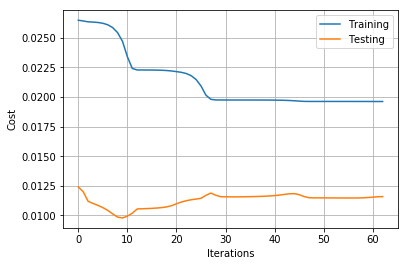

In [15]:
plot.plot(T.J)
plot.plot(T.testJ)
plot.grid(1)
plot.xlabel('Iterations')
plot.ylabel('Cost')
plot.legend(['Training', 'Testing'])
plot.show()

In [16]:
T.J

[array([0.02649356]),
 array([0.02643316]),
 array([0.02635817]),
 array([0.02633947]),
 array([0.02630442]),
 array([0.02623757]),
 array([0.02611043]),
 array([0.02587322]),
 array([0.02544779]),
 array([0.02471447]),
 array([0.02340877]),
 array([0.02241592]),
 array([0.02228987]),
 array([0.02228894]),
 array([0.0222872]),
 array([0.02228387]),
 array([0.02227754]),
 array([0.02226564]),
 array([0.02224392]),
 array([0.02220662]),
 array([0.02215079]),
 array([0.02209119]),
 array([0.02198911]),
 array([0.02180618]),
 array([0.02148151]),
 array([0.02093566]),
 array([0.0201602]),
 array([0.01980761]),
 array([0.01975771]),
 array([0.01975212]),
 array([0.01975186]),
 array([0.0197514]),
 array([0.01975083]),
 array([0.01975073]),
 array([0.01975062]),
 array([0.01975044]),
 array([0.0197501]),
 array([0.01974947]),
 array([0.01974832]),
 array([0.0197462]),
 array([0.01974243]),
 array([0.01973593]),
 array([0.01972528]),
 array([0.01970889]),
 array([0.01968686]),
 array([0.01965

In [17]:
T.testJ

[array([0.01240077]),
 array([0.01199549]),
 array([0.01118811]),
 array([0.01100647]),
 array([0.0108436]),
 array([0.01065642]),
 array([0.01041956]),
 array([0.01012923]),
 array([0.00985256]),
 array([0.00978406]),
 array([0.00993314]),
 array([0.01018377]),
 array([0.0105393]),
 array([0.01055744]),
 array([0.0105738]),
 array([0.01059309]),
 array([0.01061925]),
 array([0.0106577]),
 array([0.01071744]),
 array([0.01081475]),
 array([0.01097891]),
 array([0.01112702]),
 array([0.01123913]),
 array([0.0113192]),
 array([0.01137879]),
 array([0.01144553]),
 array([0.01169217]),
 array([0.01188594]),
 array([0.01170399]),
 array([0.01157787]),
 array([0.01156932]),
 array([0.01156325]),
 array([0.01156161]),
 array([0.01156684]),
 array([0.01157368]),
 array([0.01158184]),
 array([0.01159138]),
 array([0.01160333]),
 array([0.01161924]),
 array([0.01164128]),
 array([0.01167227]),
 array([0.01171513]),
 array([0.01176994]),
 array([0.01182444]),
 array([0.01183287]),
 array([0.01175

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(T.J, T.testJ)

0.01006191662450554

In [19]:
yHat=NN.forward(X)

In [20]:
yHat

array([[0.54354563],
       [0.55410994],
       [0.52043453],
       [0.5908928 ],
       [0.64006871],
       [0.65953573],
       [0.60521453],
       [0.51195941],
       [0.53173216],
       [0.63072087],
       [0.56008489],
       [0.68491678],
       [0.56763438],
       [0.5238045 ],
       [0.53533461],
       [0.65655065],
       [0.55722732],
       [0.6020839 ],
       [0.55878003],
       [0.57714007],
       [0.52348923],
       [0.6487683 ],
       [0.68606384],
       [0.65728944],
       [0.6282641 ],
       [0.56473508],
       [0.65815037],
       [0.67014636],
       [0.65683175],
       [0.70617544],
       [0.68989512],
       [0.60866866],
       [0.63369763],
       [0.69995155],
       [0.68605411],
       [0.69401249],
       [0.69272618],
       [0.62224013],
       [0.69061809],
       [0.70337625],
       [0.72904157],
       [0.69332945],
       [0.69064934],
       [0.6366468 ],
       [0.67767274],
       [0.71420672],
       [0.67526431],
       [0.584

In [21]:
y

array([[0.46778898],
       [0.58859326],
       [0.28650113],
       [0.47320807],
       [0.45271621],
       [0.38367462],
       [0.23399813],
       [0.35317372],
       [0.14062986],
       [0.26372911],
       [0.33746428],
       [0.28799656],
       [0.50986837],
       [0.50986837],
       [0.        ],
       [0.47639142],
       [0.44976976],
       [0.46613068],
       [0.5882231 ],
       [0.63635825],
       [0.57313552],
       [0.45643258],
       [0.76222627],
       [0.55359126],
       [0.71115948],
       [0.31546218],
       [0.60413983],
       [0.83761975],
       [0.7476273 ],
       [0.84718459],
       [0.85934053],
       [0.78972149],
       [0.74365922],
       [0.68135448],
       [0.89668192],
       [0.73519004],
       [0.98720739],
       [0.50502673],
       [1.        ],
       [0.93787293],
       [0.80331364],
       [0.94438769],
       [0.78782629],
       [0.70467434],
       [0.65104606],
       [0.44790417],
       [0.67977021],
       [0.530

In [22]:
from sklearn.metrics import mean_squared_error 
mean_squared_error(y,yHat) 

0.03624344428474577

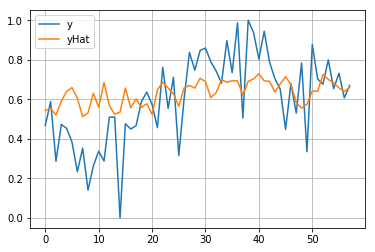

In [23]:
#Plot cost during training:
plot.plot(y)
plot.plot(yHat)
plot.grid(1)
plot.legend(['y', 'yHat'])
plot.show()

In [24]:
prediksi=NN.forward(dataprediksi)

In [25]:
prediksi

array([[0.66787287],
       [0.66775684],
       [0.67238708],
       [0.61196134]])

In [26]:
from sklearn.metrics import mean_squared_error 

In [27]:
Y_true= ([	0.67	]	,
[	0.389745184	]	,
[	0.136735812	]	,
[	0.366973156	]	,

)


Y_pred=prediksi
mean_squared_error(Y_true,Y_pred) 

0.10605912401262513

In [28]:
dataprediksi

array([[0.38732394, 0.79538041, 0.6539629 , 0.73176979, 0.60723434,
        0.67      ],
       [0.37323944, 1.        , 0.73176979, 0.60723434, 0.67      ,
        0.67      ],
       [0.36619718, 0.70768171, 0.60723434, 0.67      , 0.67      ,
        0.38974518],
       [0.44366197, 0.49169532, 0.67      , 0.67      , 0.38974518,
        0.13673581]])

In [29]:
z=np.array([	0.56136209	,	0.51319034])

In [30]:
y=np.array([0.67	,	0.389745184	,	0.136735812	,	0.366973156	])

In [31]:
a=np.concatenate((z,y))

In [32]:
#prediksi 1
prediksi=NN.forward(a)
prediksi

ValueError: shapes (3,) and (6,1) not aligned: 3 (dim 0) != 6 (dim 0)

In [ ]:
#prediksi 2
c=prediksi
z1=np.array([0.59014524	,	0.48673204])
b=y[1:]
d=np.concatenate((z1,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 3
c=prediksi
z2=np.array([0.52737156	,	0.43012934])
b=y[1:]
d=np.concatenate((z2,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 4
c=prediksi
z3=np.array([0.460205	,	0.41357631])
b=y[1:]
d=np.concatenate((z3,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 5
c=prediksi
z4=np.array([0.40834019	,	0.41626853])
b=y[1:]
d=np.concatenate((z4,b,c))
prediksi=NN.forward(d)
prediksi

In [ ]:
#prediksi 6
c=prediksi
z5=np.array([0.42786469	,	0.41314695])
b=y[1:]
d=np.concatenate((z5,b,c))
prediksi=NN.forward(d)
prediksi